<a href="https://colab.research.google.com/github/krisdanner/krisdanner-Clustering_KMeans_synchronous_machine/blob/main/Clustering_KMeans_synchronous_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Corrente_de_carga  Fator_de_potencia  Erro_no_fator_de_potencia  \
0                3.0               0.66                       0.34   
1                3.0               0.68                       0.32   
2                3.0               0.70                       0.30   
3                3.0               0.72                       0.28   
4                3.0               0.74                       0.26   

   Mudanca_da_Cor_de_excitacao  Corrente_de_excitacao  
0                        0.383                  1.563  
1                        0.372                  1.552  
2                        0.360                  1.540  
3                        0.338                  1.518  
4                        0.317                  1.497  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Corrente_de_carga 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Initialization complete
Iteration 0, inertia 129.357754
Iteration 1, inertia 94.48698080082485
Iteration 2, inertia 92.02191459077375
Iteration 3, inertia 91.3249936288623
Iteration 4, inertia 91.18172750763061
Iteration 5, inertia 91.11084246098937
Iteration 6, inertia 91.06316128775177
Iteration 7, inertia 91.03812416585632
Iteration 8, inertia 91.01257845876485
Converged at iteration 8: center shift 1.619623620768649e-05 within tolerance 1.77614304010005e-05.
Initialization complete
Iteration 0, inertia 174.26389599999993
Iteration 1, inertia 101.95220797684601
Iteration 2, inertia 92.48295663219209
Iteration 3, inertia 91.3249936288623
Iteration 4, inertia 91.18172750763061
Iteration 5, inertia 91.11084246098937
Iteration 6, inertia 91.06316128775177
Iteration 7, inertia 91.03812416585632
Iteration 8, inertia 91.01257845876485
Converged at iteration 8: center shift 1.619623620768649e-05 within tolerance 1.77614304010005e-05.
Initialization complete
Iteration 0, inertia 138.93780800

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Predição:  [2]
[140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 376 377 378 379 380 381 382

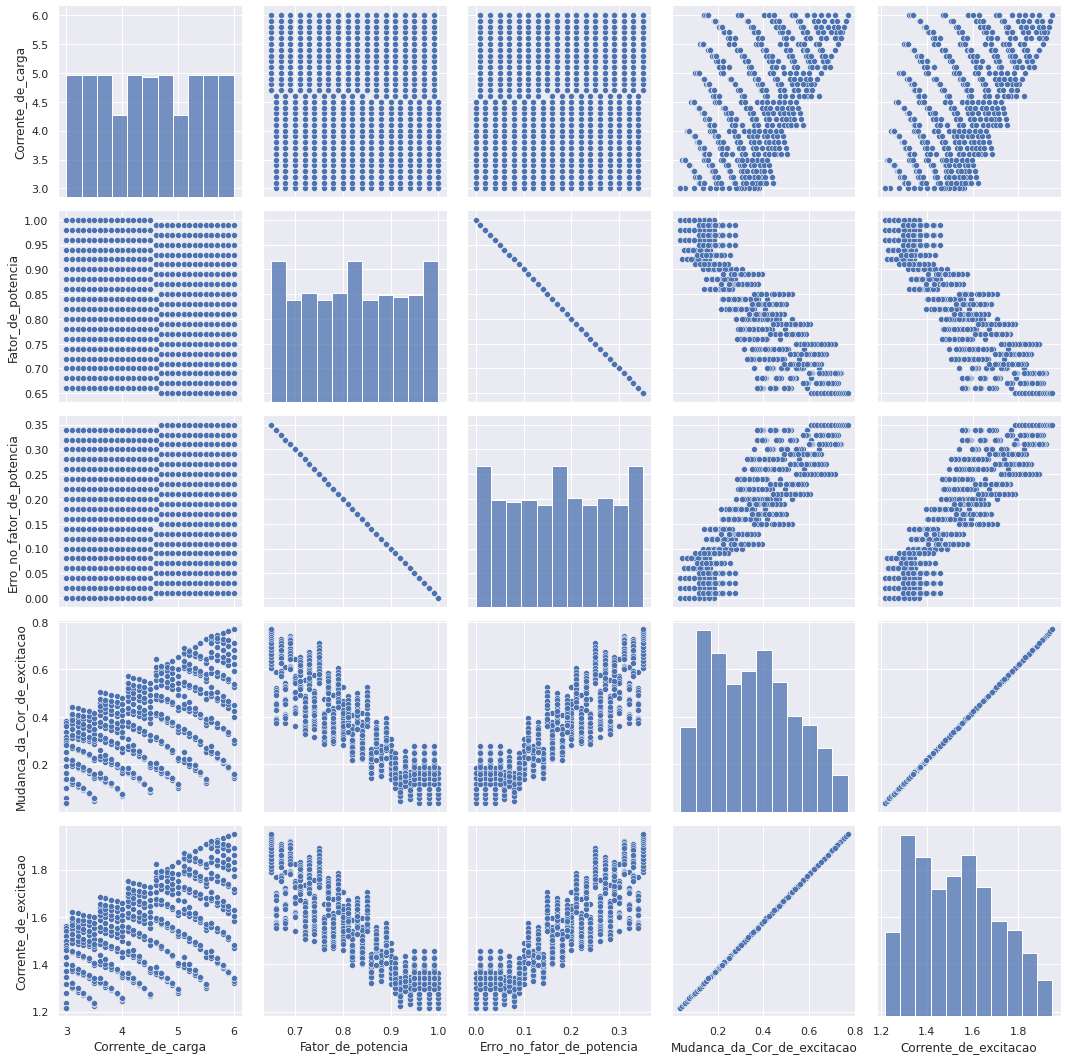

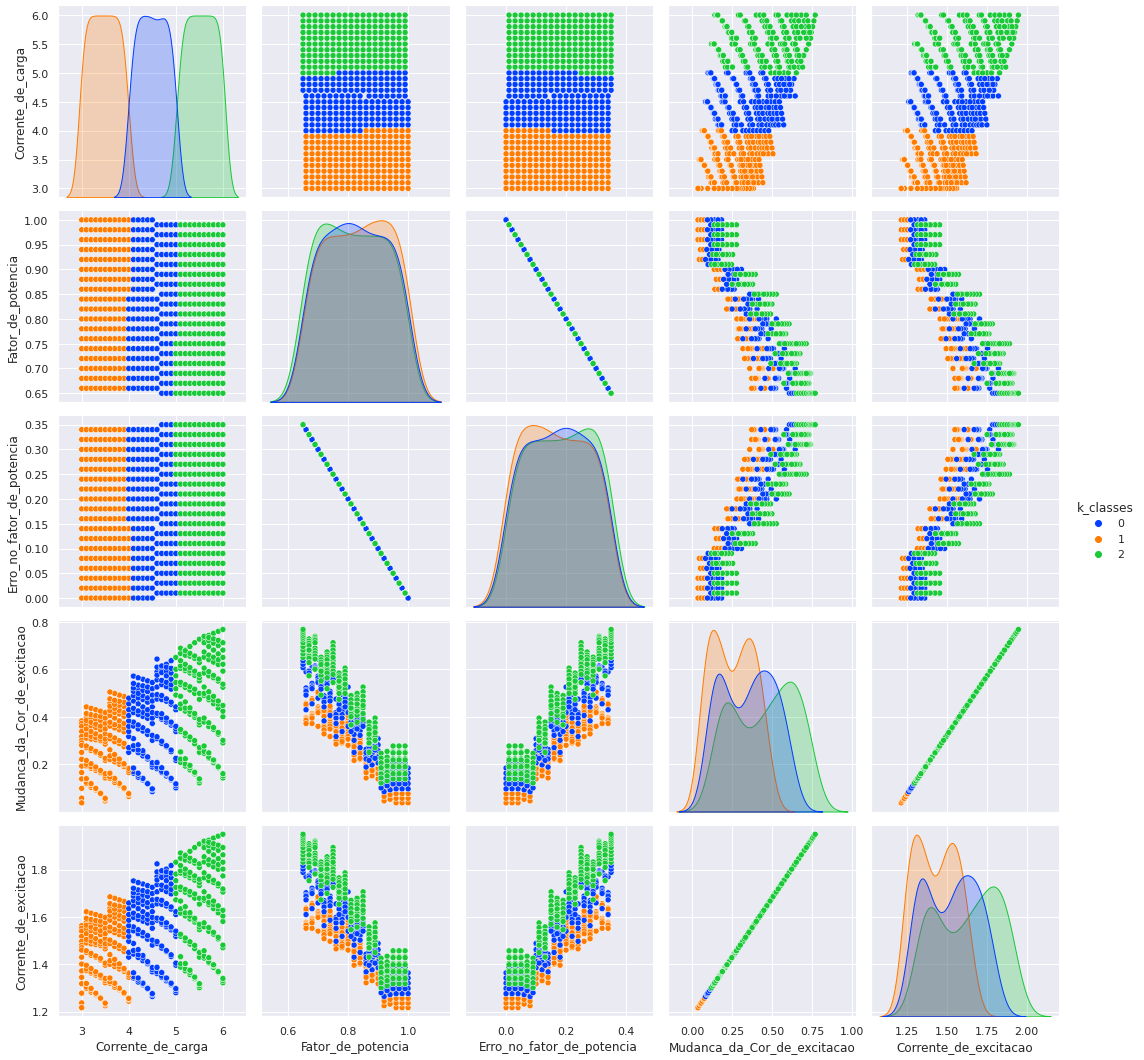

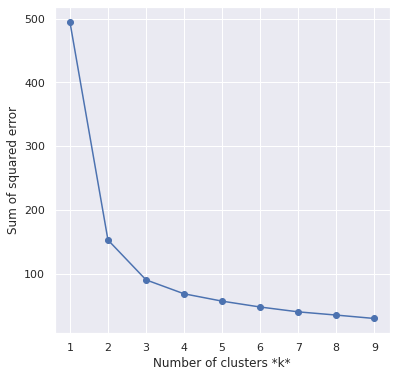

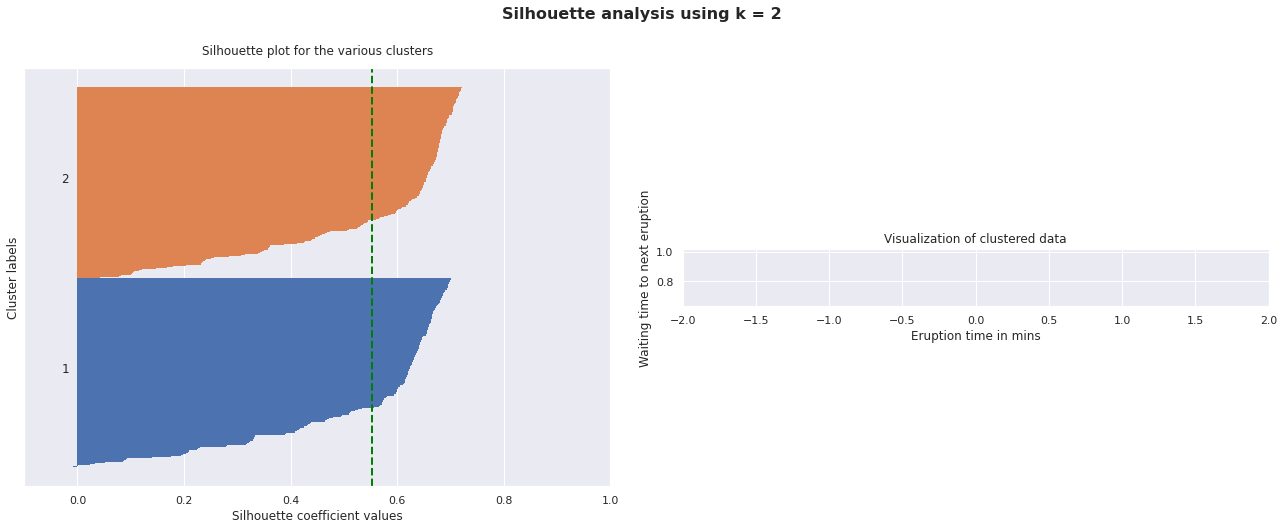

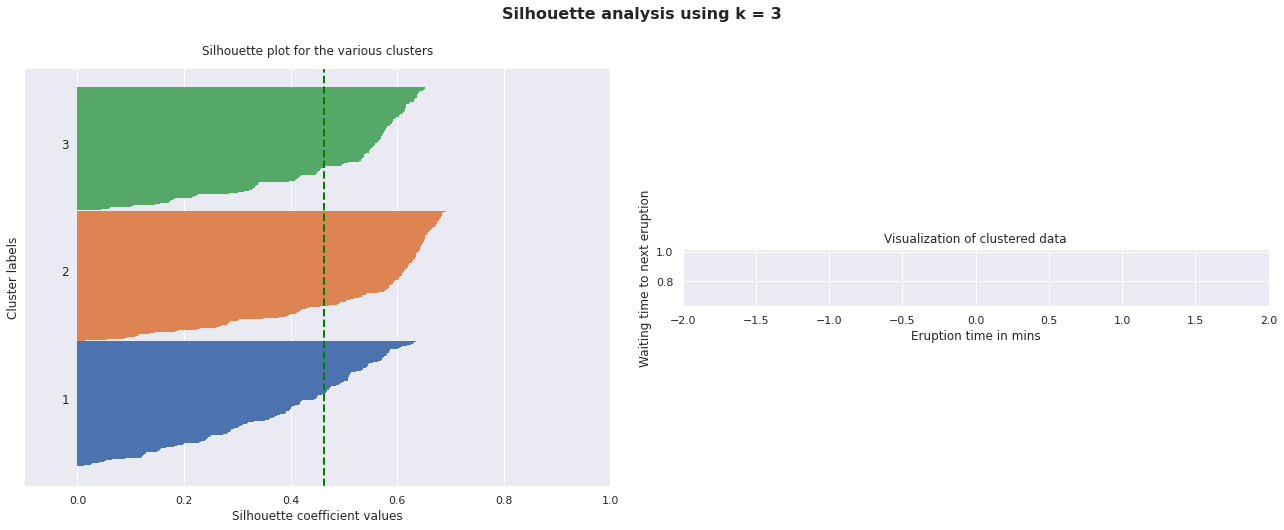

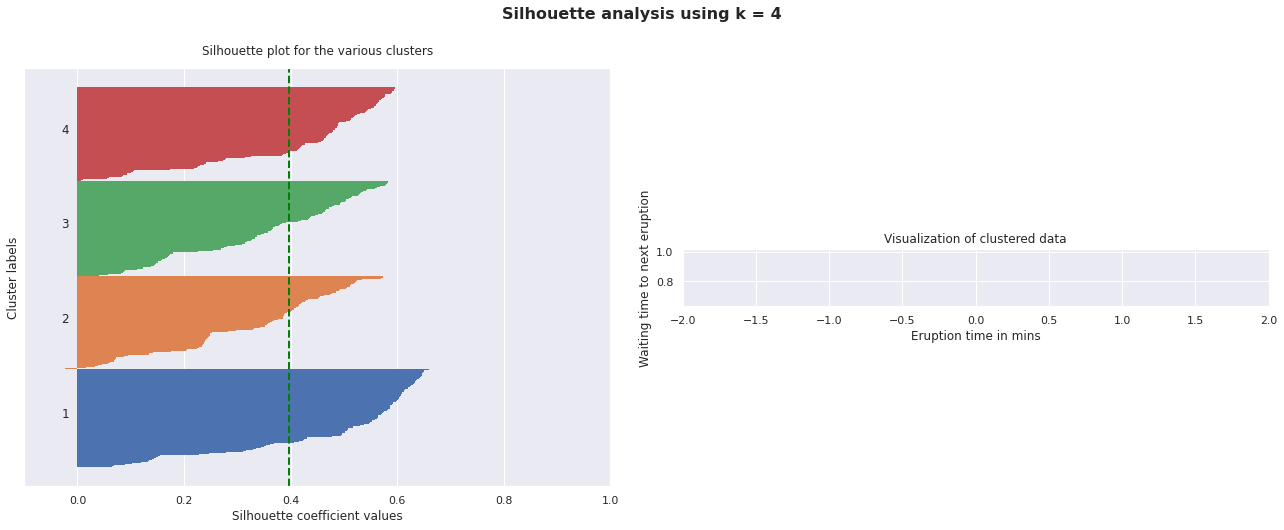

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import GridSearchCV

# Leitura dos dados

df = pd.read_csv('synchronousmachine.csv', sep=";")

# Tratamento dos dados

df.replace(',', '.')
df.astype(float)
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna(axis=0)

# Exibição dos dados e informação

nomes = {'Iy': 'Corrente_de_carga','PF': 'Fator_de_potencia','e': 'Erro_no_fator_de_potencia','dIf': 'Mudanca_da_Cor_de_excitacao','If': 'Corrente_de_excitacao'}
df.columns = df.columns.map(nomes)
print(df.head())
print(df.info())
print(df.describe().T)

# Plot da amostra (sem agrupamento)

sns.set()
sns.pairplot(df, size=3.0, palette='bright')

# Técnica de Partição com o K-means (k = numero de centróides ou grupos)

X = np.array(df)
kmeans = KMeans(n_clusters=3, random_state=0, verbose=1)
kmeans.fit(X)
print(kmeans.labels_)

# Criando coluna de classes no Dataframe

df['k_classes'] = kmeans.labels_
print(df)

# Separação dos dados de treino e teste e normalização (Para otimização)

y = np.array(df['k_classes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Plot da matriz do gráfico de dispersão (Agrupamento)

sns.set()
sns.pairplot(df, hue='k_classes', size=3.0, palette='bright')

# Predição

print('Predição: ', kmeans.predict([[7.0, 1.0, 0.09, 0.150, 1.350]]))

# Validação Cruzada (Kfold)

kf = KFold(n_splits=4)
for train, test in kf.split(X):
  print('%s %s' % (train,test))

# Avaliação do agoritmo (SSE - Método do Cotovelo)

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot SSE X k

plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared error')

# Método da Silhueta

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);

    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [ ]:
# Otimização dos hiperparâmetros

n_clusters = (2, 3, 4)
random_state = (0, 1, 2, 4)
init = ('k-means++', 'random')
n_init= (10, 20, 30)
tol = (0.0001, 0.001, 0.01)
algorithm = ("auto", "full", "elkan")

param_grid = dict(n_clusters=n_clusters, random_state=random_state,init =init,
                  n_init=n_init, tol=tol, algorithm =algorithm)

grid = GridSearchCV(estimator=kmeans, param_grid=param_grid, n_jobs=None, cv=4)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Resultados

print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) com: %r" % (mean, stdev, param))

Melhor: -8.996100 usando {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 4, 'n_init': 10, 'random_state': 2, 'tol': 0.01}
-17.288381 (0.688424) com: {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0, 'tol': 0.0001}
-17.288381 (0.688424) com: {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0, 'tol': 0.001}
-17.286202 (0.689993) com: {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 0, 'tol': 0.01}
-17.284943 (0.693414) com: {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 1, 'tol': 0.0001}
-17.284943 (0.693414) com: {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 1, 'tol': 0.001}
-17.284943 (0.693414) com: {'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 1, 'tol': 0.01}
-17.290992 (0.689606) com: {'algorithm': 'auto', 'init': 'k-means